### Lower back pain symptoms dataset

https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spine_data = pd.read_csv('datasets/spine_data.csv',
                         skiprows=1,
                         names = ['pelvic_incidence',
                                  'pelvic tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesis',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thoracic_slope',
                                  'cervical_tilt',
                                  'sacrum_angle',
                                  'scoliosis_slope',
                                  'class'])

In [81]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [82]:
spine_data.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,0.477088,8.6051,8.3058,8.53700,-0.029028,40.5823,0
1,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,0.121465,30.2830,14.6233,8.75046,4.334375,16.8302,0
2,63.900633,13.706204,62.124334,50.194429,114.129243,41.422828,0.715779,24.8714,16.6450,16.46184,-1.682575,13.9094,0
3,95.382596,24.822631,95.157633,70.559965,89.307547,57.660841,0.268276,28.6901,7.2124,13.13055,-6.412477,19.9792,0
4,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,0.044130,21.0757,10.5374,9.66748,-9.571667,30.5253,0
5,44.936675,17.443838,27.780576,27.492837,117.980325,5.569620,0.816748,27.5218,13.8357,13.54721,-2.925586,36.0452,0
6,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0.537574,33.0601,7.8080,11.37660,-5.202362,33.2503,1
7,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0.928688,14.6686,13.5700,16.12951,-17.630363,28.1902,0
8,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,0.371351,21.1136,7.1646,9.82029,-6.841914,11.6156,0
9,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,0.038359,35.6096,13.0974,12.04558,-9.237245,31.7220,1


In [4]:
spine_data.shape

(310, 13)

In [5]:
spine_data[spine_data.isnull().any(axis=1)].count()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [7]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
from sklearn import preprocessing

In [9]:
label_encoding = preprocessing.LabelEncoder()

spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [10]:
spine_data.sample(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
295,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382,0.515439,9.1955,10.6369,15.11344,2.963625,23.0719,1
96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,0.623388,21.5013,13.0551,11.35399,-14.093301,20.8180,0
42,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843,0.417637,9.3514,11.5243,12.37699,-24.199605,11.3375,0
145,85.643787,42.689195,78.750664,42.954592,105.144076,42.887426,0.844294,16.9272,8.0109,15.08030,-1.056403,11.4148,0
187,60.419932,5.265665,59.814236,55.154267,109.033075,30.265785,0.916505,35.0310,18.2437,11.95370,-1.304670,34.2437,0
164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,0.871551,17.5525,17.5404,16.73581,-17.874616,19.5841,0
262,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,0.625181,35.6342,18.7123,8.97822,-14.510574,22.6375,1
247,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307,0.487834,30.4187,15.5507,15.89565,-28.277945,22.0420,1
38,55.843286,28.847448,47.690543,26.995838,123.311845,2.812427,0.142325,12.6634,8.8550,10.55193,-16.404668,15.2954,0
139,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,0.481862,17.1681,8.4727,11.98150,-25.387556,8.3163,0


Text(0, 0.5, 'class')

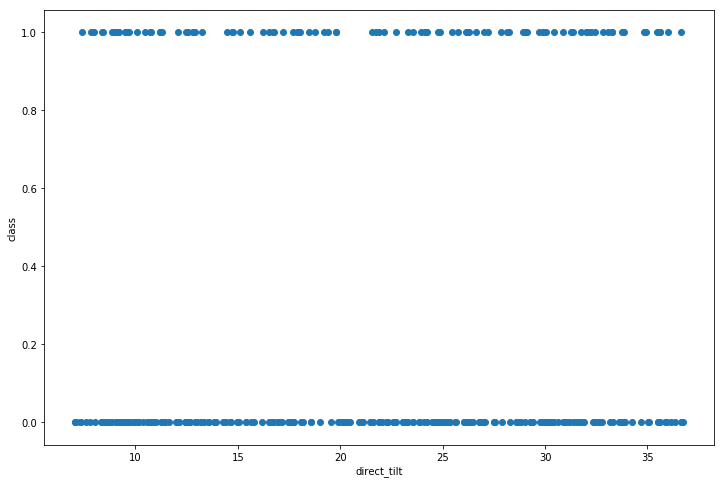

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(spine_data['direct_tilt'], spine_data['class'])

plt.xlabel('direct_tilt')
plt.ylabel('class')

Text(0, 0.5, 'class')

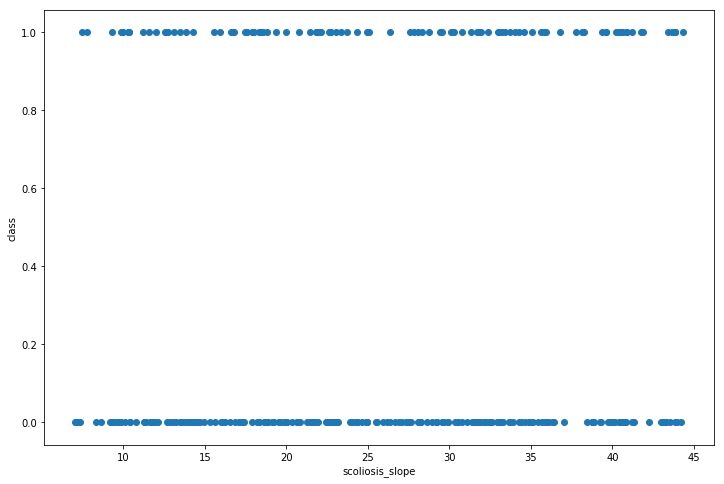

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(spine_data['scoliosis_slope'], spine_data['class'])

plt.xlabel('scoliosis_slope')
plt.ylabel('class')

In [13]:
spine_data_corr = spine_data.corr()

spine_data_corr

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


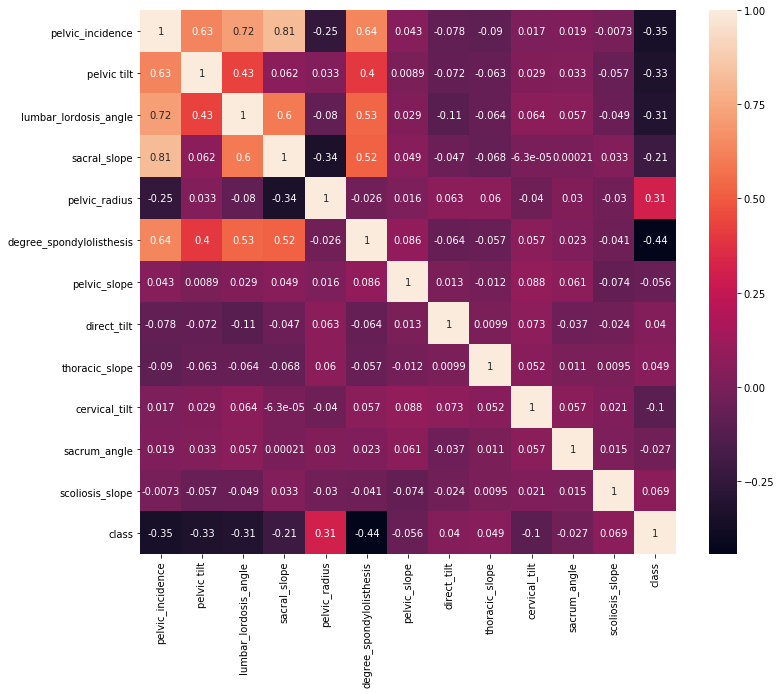

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(spine_data_corr, annot=True)

In [15]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('class', axis=1)
Y = spine_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20)

In [16]:
x_train.shape, y_train.shape

((248, 12), (248,))

In [17]:
x_test.shape, y_test.shape

((62, 12), (62,))

In [18]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ), 
                    max_iter=100, 
                    activation = 'relu',
                    alpha=0.0001,
                    solver='lbfgs', 
                    verbose=True)

In [49]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100, ), 
#                     max_iter=100, 
#                     activation = 'relu',
#                     alpha=0.0001,
#                     solver='lbfgs', 
#                     verbose=True)

In [54]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), 
#                     max_iter=100, 
#                     activation = 'relu',
#                     alpha=0.0001,
#                     solver='lbfgs', 
#                     verbose=True)

In [59]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), 
#                     max_iter=1000, 
#                     activation = 'relu',
#                     alpha=0.001,
#                     solver='lbfgs', 
#                     verbose=True)

In [64]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), 
#                     max_iter=1000, 
#                     activation = 'logistic',
#                     alpha=0.001,
#                     solver='lbfgs', 
#                     verbose=True)

In [65]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [73]:
y_pred = mlp_clf.predict(x_test)

In [74]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)

,y_test,y_pred
58,0,0
223,1,0
301,1,0
140,0,0
31,0,1
152,0,0
54,0,1
143,0,0
48,0,1
92,0,0


In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7580645161290323

In [76]:
### end here when we change classifiers

In [77]:
spine_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)

spine_data_crosstab

y_pred,0,1
y_test,,
0,33,6
1,9,14


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
print(confusion_matrix(y_test, y_pred))

[[33  6]
 [ 9 14]]


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.70      0.61      0.65        23

   micro avg       0.76      0.76      0.76        62
   macro avg       0.74      0.73      0.73        62
weighted avg       0.75      0.76      0.75        62

